Name: Muhammad Ahmed Javed

---

<center><h1>CVIP Data Science Intern</center><h1>

---
    
<h2>Phase 1: Golden Task</h2>
    
<h2>Projec Name: Breast Cancer Prediction</h2>
    
<h4>Datasource:"https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"</h4>

---
<center><h3>Steup & Libraries<center></h3>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

Importing Dataset:

In [31]:
file = pd.read_csv("data.csv")
file.drop(['id', 'Unnamed: 32'], axis=1,inplace=True)
file.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking Shape:

In [32]:
file.shape

(569, 31)

In [33]:
file.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
print(f"file shape before dropping duplicates{file.shape}")
file.drop_duplicates(inplace=True)
print(f"file shape after dropping duplicates{file.shape}")

file shape before dropping duplicates(569, 31)
file shape after dropping duplicates(569, 31)


In [35]:
file.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
file.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

---

Identifying and Removing Outliers:

---

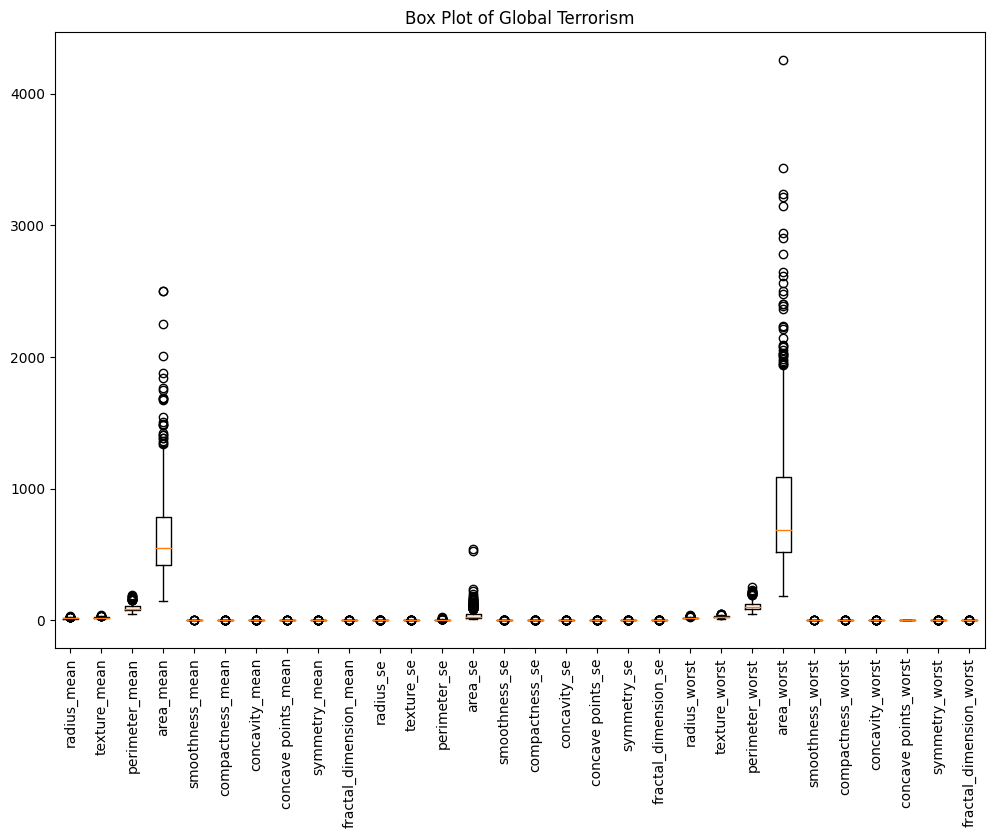

In [38]:
numeric_columns =file.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of Global Terrorism")
plt.xticks(rotation=90)
plt.show()

In [39]:
def remove_outliers(dataframe):
    df_copy = dataframe.copy()
    for column in df_copy.columns:
        column_dtype = df_copy[column].dtype
        if column_dtype in [int, float]:
            q1 = df_copy[column].quantile(0.25)
            q3 = df_copy[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
    return df_copy
print(f"File shape before removing outliers{file.shape}")
df=remove_outliers(file)
print(f"File shape after removing outliers{df.shape}")

File shape before removing outliers(569, 31)
File shape after removing outliers(277, 31)


Correlation Matrix with Heatmap:

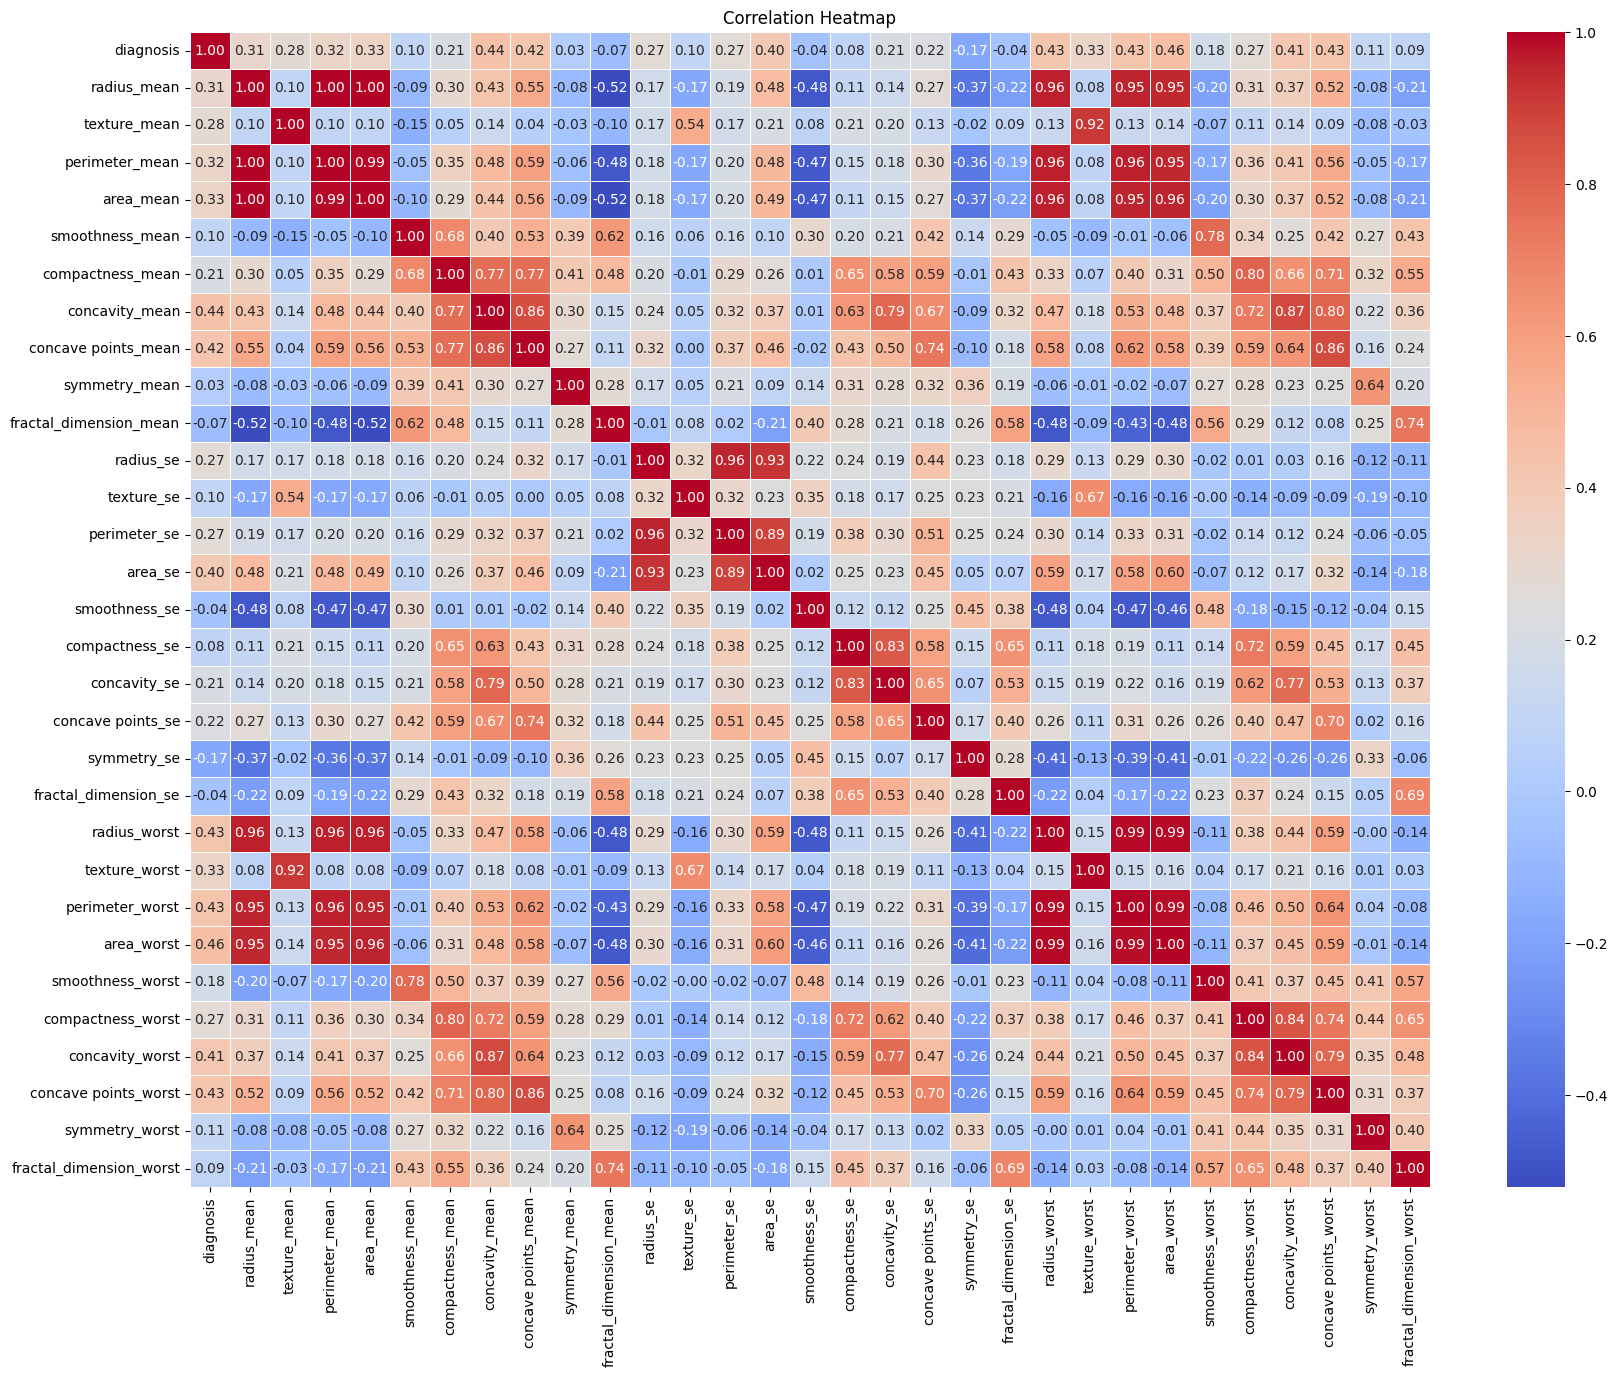

In [44]:
df['diagnosis']=df['diagnosis'].map({'M': 1, 'B': 0})
plt.figure(figsize=(20, 15))
sbs.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Developing ML model:


In [40]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [41]:
y=y.map({'M': 1, 'B': 0})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#---------------------------------------
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)
#--------------------------------
y_pred = model.predict(X_test)
#------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:', classification_report(y_test, y_pred))


Accuracy: 96.43%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.33      0.50         3

    accuracy                           0.96        56
   macro avg       0.98      0.67      0.74        56
weighted avg       0.97      0.96      0.96        56



In [50]:
X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

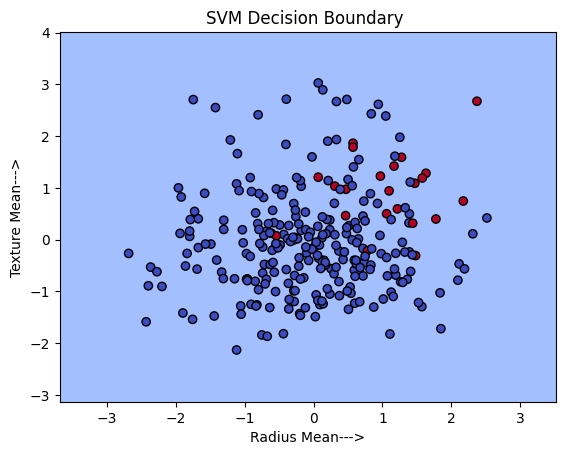

In [53]:
# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('SVM Decision Boundary ')
plt.xlabel('Radius Mean--->')
plt.ylabel('Texture Mean--->')
plt.show()
